Module - CIS7017 Dissertation
Student ID - #20275320

## Load data

In [14]:
# Import all relevant libraries

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Load the saved dataset
df = pd.read_csv('utah_traffic_accidents.csv')
df

,Severity,Start_Time,End_Time,Geo_lat,Geo_lng,Distance,City,Temperature,Humidity,Pressure,...,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Altitude,Time_Duration,Snowfall
0,1,2022-09-08 09:48:19,2022-09-08 11:00:12,40.781876,-111.910858,0.000,Salt Lake City,86.0,25.0,25.72,...,False,False,False,Day,Day,Day,Day,1293.0,4313.0,0.0
1,2,2022-09-08 10:31:25,2022-09-08 11:00:49,40.297562,-111.725700,0.000,Orem,82.0,30.0,25.51,...,False,False,False,Day,Day,Day,Day,1408.0,1764.0,0.0
2,1,2022-09-08 06:49:58,2022-09-08 07:26:57,38.521690,-109.496834,0.000,Moab,64.0,23.0,25.40,...,False,False,False,Night,Day,Day,Day,1406.0,2219.0,0.0
3,2,2022-09-08 08:50:51,2022-09-08 09:19:43,40.769329,-111.899712,0.000,Salt Lake City,82.0,27.0,25.75,...,False,False,True,Day,Day,Day,Day,1310.0,1732.0,0.0
4,1,2022-09-08 08:56:00,2022-09-08 09:57:54,40.837925,-111.915627,0.000,North Salt Lake,82.0,27.0,25.75,...,False,False,False,Day,Day,Day,Day,1303.0,3714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66177,2,2019-08-23 18:18:00,2019-08-23 19:36:58,41.190640,-112.049030,0.037,Ogden,81.0,18.0,25.46,...,False,False,False,Day,Day,Day,Day,1313.0,4738.0,0.0
66178,2,2019-08-23 18:42:00,2019-08-23 19:42:00,40.725580,-112.204935,0.019,Magna,85.0,18.0,25.64,...,False,False,False,Day,Day,Day,Day,1289.0,3600.0,0.0
66179,2,2019-08-23 18:42:00,2019-08-23 19:42:00,40.725662,-112.204579,0.020,Magna,85.0,18.0,25.64,...,False,False,False,Day,Day,Day,Day,1289.0,3600.0,0.0
66180,2,2019-08-23 18:59:00,2019-08-23 19:58:00,41.209522,-111.948491,0.028,Ogden,80.0,20.0,25.45,...,False,False,False,Day,Day,Day,Day,1383.0,3540.0,0.0


In [ ]:
# Checking categorical values of features

for column in ['City', 'Wind_Direction']:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())

In [ ]:
# Time series analysis on daily incidents over time.

df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df.set_index('Start_Time', inplace=True)
daily_accidents = df.resample('D').size()

# Plotting the time series of accidents
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents, label='Daily Accidents', color='blue')
plt.title('Daily Traffic Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Plotting the altitude distribution

plt.figure(figsize=(10, 6))
plt.hist(df['Altitude'].dropna(), bins=50, color='skyblue', edgecolor='black') 
plt.title('Altitude Distribution of the dataset') 
plt.xlabel('Altitude (meters)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

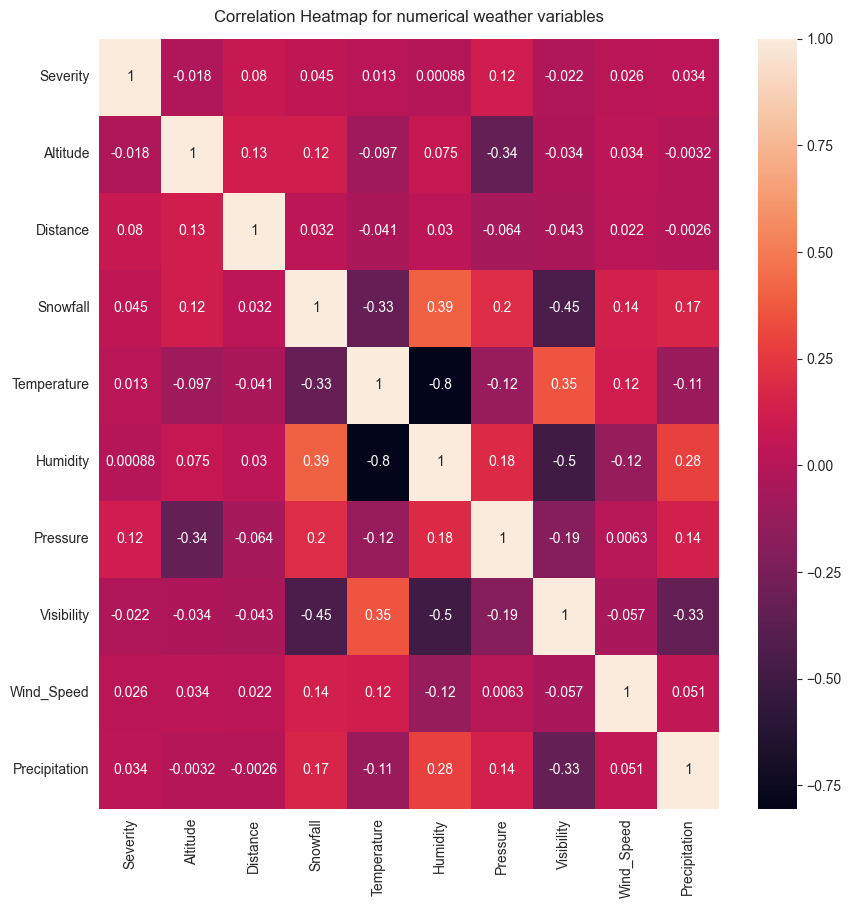

In [16]:
# correlation heatmap for numerical variables
numerical_heatmap = [
       'Severity', 'Altitude', 'Distance', 'Snowfall', 'Temperature',
       'Humidity', 'Pressure', 'Visibility','Wind_Speed', 'Precipitation'
]
    
#heat map to find extreme positive and negative correlations
plt.figure(figsize=(10, 10))
sns.heatmap(df[numerical_heatmap].corr(), annot=True)
plt.title('Correlation Heatmap for numerical weather variables', fontdict={'fontsize':12}, pad=12);

In [11]:
# correlation heatmap for categorical variables

numerical_heatmap = [
       'Severity', 'Altitude', 'Distance', 'Snowfall', 'Temperature',
       'Humidity', 'Pressure', 'Visibility','Wind_Speed', 'Precipitation', 'Civil_Twilight'
]

df_with_dummies = pd.get_dummies(df[numerical_heatmap], columns=['Civil_Twilight'])
correlation_matrix = df_with_dummies.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap including Categorical Variables')
plt.show()


KeyError: "['Snowfall'] not in index"

In [ ]:
import folium

# Define a approximate central point for initializing the map.
central_utah = [39.3210, -111.0937]

# Create a map centered around this point
utah_map = folium.Map(location=central_utah, zoom_start=6, tiles='Stamen Terrain', attr="folium")

# adding each accident location as a marker on the map
for idx, row in df.iterrows():
    if not pd.isna(row['Geo_lat']) and not pd.isna(row['Geo_lng']):
        folium.CircleMarker(
            location=[row['Geo_lat'], row['Geo_lng']],
            radius=2,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.3
        ).add_to(utah_map)

# Show the map
utah_map


## Heat map of existing data points

In [ ]:
import folium
from folium.plugins import HeatMap

# Creating a base map using the average latitude and longitude from the dataset
m = folium.Map(location=[df['Geo_lat'].mean(), df['Geo_lng'].mean()], zoom_start=5)

# Adding a heatmap layer to the base map
# 'data' expects a list of points of the form [latitude, longitude, weight]
heatmap_data = df[['Geo_lat', 'Geo_lng']].values  # 'Severity' as a placeholder for the weight
HeatMap(heatmap_data, radius=10, max_zoom=13).add_to(m)

# Save to an HTML file (Open with browser)
m.save('heatmap.html')


In [ ]:
import folium
from folium.plugins import HeatMap

central_utah = [39.3210, -111.0937]
utah_map = folium.Map(location=central_utah, zoom_start=6)

# Extract latitude and longitude pairs for the heatmap
heat_data = [[row['Geo_lat'], row['Geo_lng']] for index, row in df.iterrows()]

# Create and add a HeatMap layer
HeatMap(heat_data).add_to(utah_map)

utah_map


In [8]:
import folium
from folium.plugins import HeatMap

# Create a base map
central_utah = [39.3210, -111.0937]
m = folium.Map(location=central_utah, zoom_start=6)

# Add a heatmap layer for each severity level
for severity in range(1, 5):  # Assuming severity levels are 1, 2, 3, 4
    # Filter data by severity
    severity_data = df[df['Severity'] == severity][['Geo_lat', 'Geo_lng']].values.tolist()
    HeatMap(severity_data, radius=10, max_zoom=1).add_to(m)

# Save or show the map
m.save('outputmaps/heatmap.html')
